# Demonstration of the cental limit theorem

First import what is needed

In [1]:
from ROOT import TH1D, gRandom, TCanvas
from math import sqrt

Welcome to JupyROOT 6.12/07


Define histograms with sum fo random numbers

In [2]:
points = [1, 2, 3, 6, 12, 20, 40]
histos = {}
for p in points:
    histos[p] = TH1D(str(p), str(p), 100, -6, 6)

Fill the histograms with random numbers

In [3]:
for n in range(100000):
    for p in points:
        x = 0.
        for n2 in range(p):
            x += gRandom.Uniform()
        histos[p].Fill((x - p/2.)/sqrt(p/12.))

Plot Histograms separately

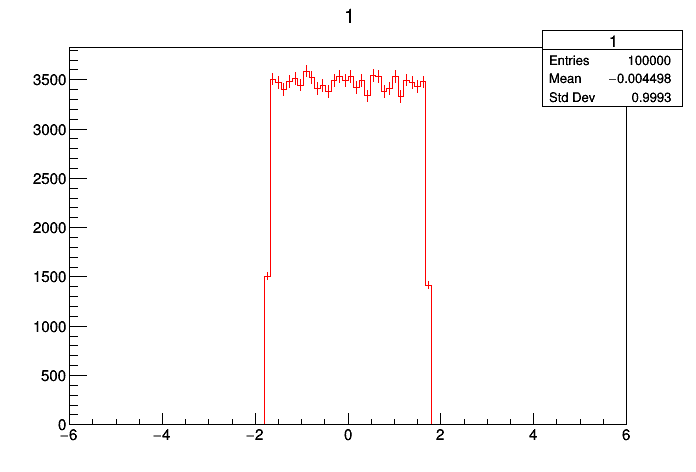

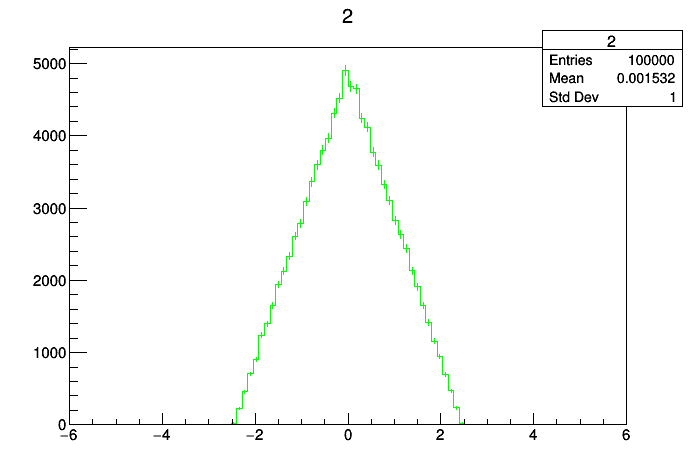

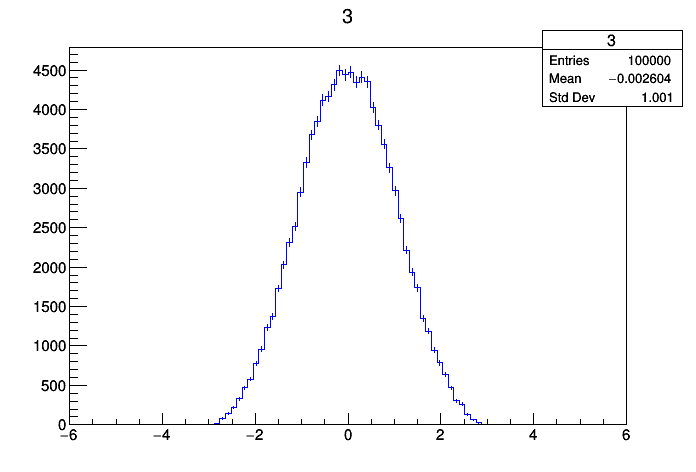

In [4]:
c = []
for p in points[:3]:
    c.append(TCanvas())
    histos[p].SetLineColor(p+1)
    histos[p].Draw("hist e")
    c[-1].Draw()

Plot histograms together

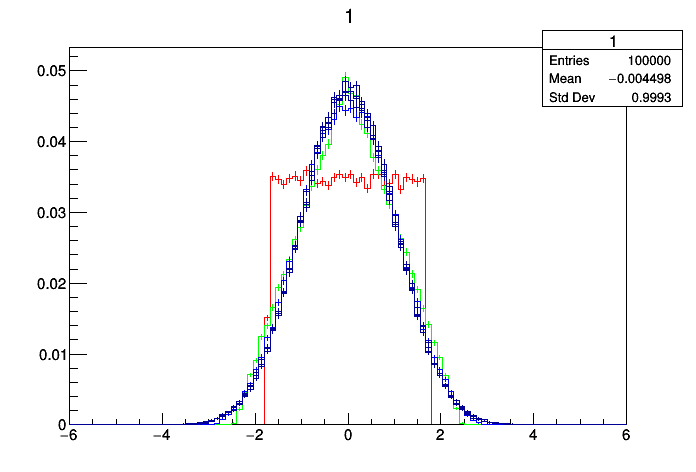

In [5]:
c.append(TCanvas())
for p in points:
    histos[p].Scale(1./histos[p].Integral());
    histos[p].Draw("hist e" if p == 1 else "hist e same");
histos[1].SetMaximum(1.1*histos[40].GetMaximum())
c[-1].Draw()